In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_21272\3538350959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('car_loan.csv')
df.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_21272\3207881456.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('car_loan.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,83,68376217,NaN,23100.0,23100.0,23100.0,60 months,20.50,618.46,E,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,111,68377006,NaN,6000.0,6000.0,6000.0,36 months,7.91,187.77,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,323,68566571,NaN,3600.0,3600.0,3600.0,36 months,11.48,118.68,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,432,68596423,NaN,15000.0,15000.0,15000.0,36 months,9.17,478.19,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,437,68386728,NaN,10800.0,10800.0,10800.0,60 months,8.49,221.53,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,443,68338676,NaN,6000.0,6000.0,6000.0,36 months,10.78,195.81,B,...,NaN,NaN,Cash,Y,Jul-2018,COMPLETE,Mar-2018,1203.0,45.02,6.0
6,490,68526473,NaN,3500.0,3500.0,3500.0,36 months,9.80,112.61,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,605,68536967,NaN,12250.0,12250.0,12250.0,60 months,9.17,255.31,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,619,68494601,NaN,24000.0,24000.0,24000.0,36 months,7.49,746.44,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,661,68616576,NaN,18000.0,18000.0,18000.0,60 months,10.78,389.40,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("\nТипы данных каждого столбца:")
print(df.dtypes)
print("\nСтолбцы с пропущенными значениями:")
print(df.columns[df.isnull().any()].tolist())


Типы данных каждого столбца:
Unnamed: 0                 int64
id                         int64
member_id                float64
loan_amnt                float64
funded_amnt              float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 152, dtype: object

Столбцы с пропущенными значениями:
['member_id', 'emp_title', 'emp_length', 'desc', 'title', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_

In [4]:
# Давайте удалим столбцы где пропущены 70% значений и более
threshold = 0.7 * len(df)
drop_columns = df.columns[df.isna().sum() > threshold]
df = df.drop(drop_columns, axis=1)
df

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,83,68376217,23100.0,23100.0,23100.0,60 months,20.50,618.46,E,E4,...,85.7,0.0,0.0,102524.0,55048.0,21700.0,80824.0,N,Cash,N
1,111,68377006,6000.0,6000.0,6000.0,36 months,7.91,187.77,A,A5,...,0.0,0.0,3.0,225933.0,40615.0,6100.0,54068.0,N,Cash,N
2,323,68566571,3600.0,3600.0,3600.0,36 months,11.48,118.68,B,B5,...,33.3,1.0,0.0,259782.0,65226.0,7400.0,64750.0,N,Cash,N
3,432,68596423,15000.0,15000.0,15000.0,36 months,9.17,478.19,B,B2,...,25.0,1.0,0.0,22300.0,15450.0,6200.0,8000.0,N,Cash,N
4,437,68386728,10800.0,10800.0,10800.0,60 months,8.49,221.53,B,B1,...,12.5,0.0,0.0,298922.0,39042.0,50000.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24008,2260265,90521136,28000.0,28000.0,28000.0,36 months,15.59,978.74,C,C5,...,100.0,0.0,0.0,273953.0,40427.0,13900.0,43953.0,N,Cash,N
24009,2260331,90156180,12000.0,12000.0,12000.0,60 months,12.79,271.75,C,C1,...,42.9,0.0,0.0,43126.0,22882.0,26200.0,14926.0,N,Cash,N
24010,2260355,90158512,12000.0,12000.0,12000.0,36 months,14.49,413.00,C,C4,...,0.0,1.0,0.0,50303.0,28447.0,4400.0,34103.0,N,Cash,N
24011,2260374,90266004,28000.0,28000.0,28000.0,36 months,16.99,998.14,D,D1,...,87.5,0.0,0.0,632942.0,61435.0,43200.0,33971.0,N,Cash,N


In [5]:
# Теперь давайте остальные пропущенные значения заполним средним значением и модой соответсвенно
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0])
    else:
        df[column].fillna(df[column].mean())
df

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,83,68376217,23100.0,23100.0,23100.0,60 months,20.50,618.46,E,E4,...,85.7,0.0,0.0,102524.0,55048.0,21700.0,80824.0,N,Cash,N
1,111,68377006,6000.0,6000.0,6000.0,36 months,7.91,187.77,A,A5,...,0.0,0.0,3.0,225933.0,40615.0,6100.0,54068.0,N,Cash,N
2,323,68566571,3600.0,3600.0,3600.0,36 months,11.48,118.68,B,B5,...,33.3,1.0,0.0,259782.0,65226.0,7400.0,64750.0,N,Cash,N
3,432,68596423,15000.0,15000.0,15000.0,36 months,9.17,478.19,B,B2,...,25.0,1.0,0.0,22300.0,15450.0,6200.0,8000.0,N,Cash,N
4,437,68386728,10800.0,10800.0,10800.0,60 months,8.49,221.53,B,B1,...,12.5,0.0,0.0,298922.0,39042.0,50000.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24008,2260265,90521136,28000.0,28000.0,28000.0,36 months,15.59,978.74,C,C5,...,100.0,0.0,0.0,273953.0,40427.0,13900.0,43953.0,N,Cash,N
24009,2260331,90156180,12000.0,12000.0,12000.0,60 months,12.79,271.75,C,C1,...,42.9,0.0,0.0,43126.0,22882.0,26200.0,14926.0,N,Cash,N
24010,2260355,90158512,12000.0,12000.0,12000.0,36 months,14.49,413.00,C,C4,...,0.0,1.0,0.0,50303.0,28447.0,4400.0,34103.0,N,Cash,N
24011,2260374,90266004,28000.0,28000.0,28000.0,36 months,16.99,998.14,D,D1,...,87.5,0.0,0.0,632942.0,61435.0,43200.0,33971.0,N,Cash,N


In [6]:
# Обнаружние и удаление дубликатов
duble = df.duplicated()
print(duble)
df.drop_duplicates()

0        False
1        False
2        False
3        False
4        False
         ...  
24008    False
24009    False
24010    False
24011    False
24012    False
Length: 24013, dtype: bool


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,83,68376217,23100.0,23100.0,23100.0,60 months,20.50,618.46,E,E4,...,85.7,0.0,0.0,102524.0,55048.0,21700.0,80824.0,N,Cash,N
1,111,68377006,6000.0,6000.0,6000.0,36 months,7.91,187.77,A,A5,...,0.0,0.0,3.0,225933.0,40615.0,6100.0,54068.0,N,Cash,N
2,323,68566571,3600.0,3600.0,3600.0,36 months,11.48,118.68,B,B5,...,33.3,1.0,0.0,259782.0,65226.0,7400.0,64750.0,N,Cash,N
3,432,68596423,15000.0,15000.0,15000.0,36 months,9.17,478.19,B,B2,...,25.0,1.0,0.0,22300.0,15450.0,6200.0,8000.0,N,Cash,N
4,437,68386728,10800.0,10800.0,10800.0,60 months,8.49,221.53,B,B1,...,12.5,0.0,0.0,298922.0,39042.0,50000.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24008,2260265,90521136,28000.0,28000.0,28000.0,36 months,15.59,978.74,C,C5,...,100.0,0.0,0.0,273953.0,40427.0,13900.0,43953.0,N,Cash,N
24009,2260331,90156180,12000.0,12000.0,12000.0,60 months,12.79,271.75,C,C1,...,42.9,0.0,0.0,43126.0,22882.0,26200.0,14926.0,N,Cash,N
24010,2260355,90158512,12000.0,12000.0,12000.0,36 months,14.49,413.00,C,C4,...,0.0,1.0,0.0,50303.0,28447.0,4400.0,34103.0,N,Cash,N
24011,2260374,90266004,28000.0,28000.0,28000.0,36 months,16.99,998.14,D,D1,...,87.5,0.0,0.0,632942.0,61435.0,43200.0,33971.0,N,Cash,N


In [7]:

# Для тогт чтобы создать новый столбец Loan_Grade начнем с обозгачения квантилей для столбца loan_amnt
quantiles = df['loan_amnt'].quantile([0.33, 0.67])
quantiles

0.33     5200.0
0.67    10000.0
Name: loan_amnt, dtype: float64

In [8]:
# По выведенным данным создадим функцию
def categorize_loan(amount):
    if amount <= 5200:
        return 'Low'
    elif amount <= 10000:
        return 'Medium'
    else:
        return 'High'
df['Loan_Grade'] = df['loan_amnt'].apply(categorize_loan)

In [9]:
df

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Loan_Grade
0,83,68376217,23100.0,23100.0,23100.0,60 months,20.50,618.46,E,E4,...,0.0,0.0,102524.0,55048.0,21700.0,80824.0,N,Cash,N,High
1,111,68377006,6000.0,6000.0,6000.0,36 months,7.91,187.77,A,A5,...,0.0,3.0,225933.0,40615.0,6100.0,54068.0,N,Cash,N,Medium
2,323,68566571,3600.0,3600.0,3600.0,36 months,11.48,118.68,B,B5,...,1.0,0.0,259782.0,65226.0,7400.0,64750.0,N,Cash,N,Low
3,432,68596423,15000.0,15000.0,15000.0,36 months,9.17,478.19,B,B2,...,1.0,0.0,22300.0,15450.0,6200.0,8000.0,N,Cash,N,High
4,437,68386728,10800.0,10800.0,10800.0,60 months,8.49,221.53,B,B1,...,0.0,0.0,298922.0,39042.0,50000.0,0.0,N,Cash,N,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24008,2260265,90521136,28000.0,28000.0,28000.0,36 months,15.59,978.74,C,C5,...,0.0,0.0,273953.0,40427.0,13900.0,43953.0,N,Cash,N,High
24009,2260331,90156180,12000.0,12000.0,12000.0,60 months,12.79,271.75,C,C1,...,0.0,0.0,43126.0,22882.0,26200.0,14926.0,N,Cash,N,High
24010,2260355,90158512,12000.0,12000.0,12000.0,36 months,14.49,413.00,C,C4,...,1.0,0.0,50303.0,28447.0,4400.0,34103.0,N,Cash,N,High
24011,2260374,90266004,28000.0,28000.0,28000.0,36 months,16.99,998.14,D,D1,...,0.0,0.0,632942.0,61435.0,43200.0,33971.0,N,Cash,N,High


In [10]:
# Приведение всех строковых данных к нижнему регистру
df = df.map(lambda x: x.lower() if isinstance(x,str) else x)
df

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Loan_Grade
0,83,68376217,23100.0,23100.0,23100.0,60 months,20.50,618.46,e,e4,...,0.0,0.0,102524.0,55048.0,21700.0,80824.0,n,cash,n,high
1,111,68377006,6000.0,6000.0,6000.0,36 months,7.91,187.77,a,a5,...,0.0,3.0,225933.0,40615.0,6100.0,54068.0,n,cash,n,medium
2,323,68566571,3600.0,3600.0,3600.0,36 months,11.48,118.68,b,b5,...,1.0,0.0,259782.0,65226.0,7400.0,64750.0,n,cash,n,low
3,432,68596423,15000.0,15000.0,15000.0,36 months,9.17,478.19,b,b2,...,1.0,0.0,22300.0,15450.0,6200.0,8000.0,n,cash,n,high
4,437,68386728,10800.0,10800.0,10800.0,60 months,8.49,221.53,b,b1,...,0.0,0.0,298922.0,39042.0,50000.0,0.0,n,cash,n,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24008,2260265,90521136,28000.0,28000.0,28000.0,36 months,15.59,978.74,c,c5,...,0.0,0.0,273953.0,40427.0,13900.0,43953.0,n,cash,n,high
24009,2260331,90156180,12000.0,12000.0,12000.0,60 months,12.79,271.75,c,c1,...,0.0,0.0,43126.0,22882.0,26200.0,14926.0,n,cash,n,high
24010,2260355,90158512,12000.0,12000.0,12000.0,36 months,14.49,413.00,c,c4,...,1.0,0.0,50303.0,28447.0,4400.0,34103.0,n,cash,n,high
24011,2260374,90266004,28000.0,28000.0,28000.0,36 months,16.99,998.14,d,d1,...,0.0,0.0,632942.0,61435.0,43200.0,33971.0,n,cash,n,high


In [11]:
# Вычислим среднюю процентную ставку
mean_interest = df['int_rate'].mean()
result = df[df['int_rate'] < mean_interest]
result

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,Loan_Grade
1,111,68377006,6000.0,6000.0,6000.0,36 months,7.91,187.77,a,a5,...,0.0,3.0,225933.0,40615.0,6100.0,54068.0,n,cash,n,medium
2,323,68566571,3600.0,3600.0,3600.0,36 months,11.48,118.68,b,b5,...,1.0,0.0,259782.0,65226.0,7400.0,64750.0,n,cash,n,low
3,432,68596423,15000.0,15000.0,15000.0,36 months,9.17,478.19,b,b2,...,1.0,0.0,22300.0,15450.0,6200.0,8000.0,n,cash,n,high
4,437,68386728,10800.0,10800.0,10800.0,60 months,8.49,221.53,b,b1,...,0.0,0.0,298922.0,39042.0,50000.0,0.0,n,cash,n,high
5,443,68338676,6000.0,6000.0,6000.0,36 months,10.78,195.81,b,b4,...,0.0,0.0,322369.0,29190.0,6300.0,36750.0,n,cash,y,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23999,2259415,90288854,10000.0,10000.0,10000.0,36 months,10.99,327.34,b,b4,...,0.0,0.0,63900.0,21151.0,32900.0,20000.0,n,cash,n,medium
24000,2259420,90481788,5000.0,5000.0,5000.0,36 months,7.99,156.66,a,a4,...,0.0,0.0,61366.0,37020.0,7700.0,42966.0,n,cash,n,low
24003,2259742,90724549,6000.0,6000.0,6000.0,36 months,6.99,185.24,a,a2,...,0.0,0.0,148602.0,21549.0,34300.0,33702.0,n,cash,n,medium
24004,2259940,90481753,2500.0,2500.0,2500.0,36 months,6.99,77.19,a,a2,...,0.0,0.0,103536.0,16824.0,26800.0,3849.0,n,cash,n,low


In [12]:
most_common_state = df['addr_state'].mode()
most_common_state

0    ca
Name: addr_state, dtype: object

In [13]:
# Группировка по скор рейтингу
res = df.groupby('grade').agg({'loan_amnt': 'mean', 'int_rate': 'mean'})
res

,loan_amnt,int_rate
grade,,
a,8546.452319,7.014862
b,9039.871361,10.582875
c,9722.123397,14.089457
d,10018.497060,18.221010
e,11865.856130,21.889250
f,14105.909091,25.388073
g,12960.507246,28.100290


In [16]:
# Для того чтобы сгрупировать по годам нам нужно вывести последние 4 значения из столбца issue_d
def last_four_to_numeric(row):
    last_four = row[-4:]
    return int(last_four)
df["date"] = df["issue_d"].apply(last_four_to_numeric)
res1 = df.groupby('date').agg({"id": 'sum'})
res1

,id
date,
2007,1709139
2008,17105347
2009,79165230
2010,237399609
2011,752673833
2012,1277314675
2013,6376802111
2014,40259789186
2015,187695760948


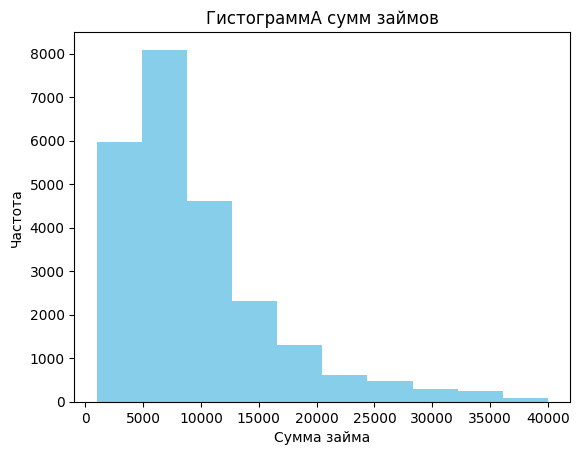

In [18]:
# Построение гистограммы сумм займов
plt.hist(df['loan_amnt'], bins=10, color = 'skyblue')
plt.title("ГистограммА сумм займов")
plt.xlabel("Сумма займа")
plt.ylabel("Частота")
plt.show()

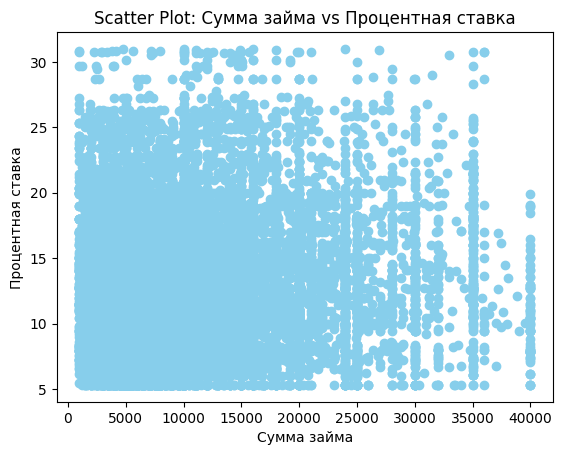

In [21]:
plt.scatter(df['loan_amnt'],df['int_rate'], color = 'skyblue')
plt.title('Scatter Plot: Сумма займа vs Процентная ставка')
plt.xlabel('Сумма займа')
plt.ylabel('Процентная ставка')
plt.show()

In [22]:
df['loan_status'].value_counts()

loan_status
fully paid                                             12444
current                                                 9064
charged off                                             2141
late (31-120 days)                                       192
in grace period                                           75
does not meet the credit policy. status:fully paid        51
late (16-30 days)                                         30
does not meet the credit policy. status:charged off       13
default                                                    3
Name: count, dtype: int64

In [26]:
df['TARGET'] = [1 if (i == 'default' or i == 'late (31-120 days)' or i=='charged off')
                else 0 for i in df['loan_status']]
df['TARGET'].value_counts()

TARGET
0    21677
1     2336
Name: count, dtype: int64

In [30]:
df['emp_length'].value_counts()

emp_length
10+ years    6838
2 years      2400
< 1 year     2368
3 years      2080
1 year       1827
5 years      1632
4 years      1585
6 years      1131
7 years       945
8 years       897
9 years       749
Name: count, dtype: int64

In [41]:
# Нужно преобразавать все эти строки в emp_length в числовые значени
import re
# Функция для извлечения чисел из строки и преобразования в числовые значения
def extract_numbers_and_convert_to_float(text):
    if isinstance(text, str):
        numbers = re.findall(r'\d+\.?\d*', text)
        numeric_values = [float(num) for num in numbers]
        return numeric_values[0]
df['emp_length2'] = df['emp_length'].apply(extract_numbers_and_convert_to_float)
df['emp_length2'].value_counts()

emp_length2
10.0    6838
1.0     4195
2.0     2400
3.0     2080
5.0     1632
4.0     1585
6.0     1131
7.0      945
8.0      897
9.0      749
Name: count, dtype: int64

In [60]:
#Расчет корреляции
import seaborn as sns
correlation_matrix = df['emp_length2'].corr(df['TARGET'])
print(correlation_matrix)
# Визуализируем корреляционную матрицу в виде тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции между emp_length и loan_status')
plt.show()

-0.03613303457568658


ValueError: Must pass 2-d input. shape=()

<Figure size 800x600 with 0 Axes>

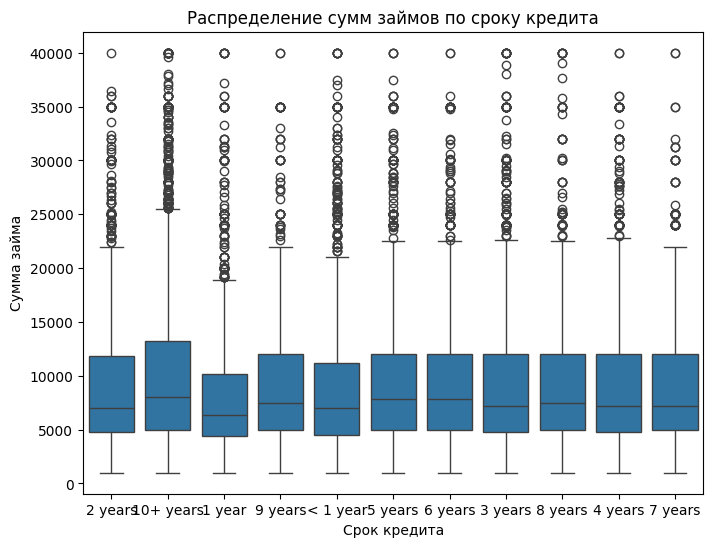

In [61]:
# Построение boxplot для распределения сумм займов по сроку кредита
plt.figure(figsize=(8, 6))
sns.boxplot(x='emp_length', y='loan_amnt', data=df)
plt.xlabel('Срок кредита')
plt.ylabel('Сумма займа')
plt.title('Распределение сумм займов по сроку кредита')
plt.show()